# 800_RQ1_Analysis 


In [681]:
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import matplotlib.image as mpimg
from matplotlib.gridspec import GridSpec
import matplotlib.gridspec as gridspec
import matplotlib as mpl
%matplotlib inline

In [682]:
np.random.seed(0)

In [683]:
RQ1 = pd.read_csv('../../data/analysis/RQ1.csv')

In [684]:
RQ1 = RQ1.drop(RQ1.columns[[0]], axis=1)

In [685]:
RQ1.head(5)

,Players,Position,club,league,age,nationality,overall,photo,injury_prone_trait,fan's_favourite_trait,Homegrown,Average Apps/Season,Previous Average Form,Apps This Season,Current Average Form
0,Lionel Messi,Forward,FC Barcelona,Spanish Primera Division,30,Argentina,93,https://cdn.sofifa.org/18/players/158023.png,False,False,False,42.00,8.255952,33.0,7.666667
1,Cristiano Ronaldo,Forward,Real Madrid CF,Spanish Primera Division,32,Portugal,94,https://cdn.sofifa.org/18/players/20801.png,False,False,False,41.00,7.926829,25.0,7.280000
2,Luis Suarez,Forward,FC Barcelona,Spanish Primera Division,30,Uruguay,92,https://cdn.sofifa.org/18/players/176580.png,False,False,False,41.25,7.018182,29.0,6.689655
3,Zlatan Ibrahimovic,Forward,Manchester United,English Premier League,35,Sweden,88,https://cdn.sofifa.org/18/players/41236.png,False,False,False,37.50,6.900000,5.0,1.200000
4,Robert Lewandowski,Forward,FC Bayern Munich,German Bundesliga,28,Poland,91,https://cdn.sofifa.org/18/players/188545.png,False,False,False,40.00,6.050000,28.0,6.785714


## Goalkeepers

In [686]:
RQ1_Goalkeepers = RQ1[RQ1['Position'] == 'Goalkeeper']

In [687]:
average_goalkeepers = RQ1_Goalkeepers[RQ1_Goalkeepers['overall']<85]
worldclass_goalkeepers = RQ1_Goalkeepers[RQ1_Goalkeepers['overall']>84]

In [688]:
w = average_goalkeepers['overall'].values[:,np.newaxis]
z = average_goalkeepers['Previous Average Form'].values
average_goalkeepers_model = LinearRegression()
average_goalkeepers_model.fit(w, z)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [689]:
x = worldclass_goalkeepers['overall'].values[:,np.newaxis]
y = worldclass_goalkeepers['Previous Average Form'].values
worldclass_goalkeepers_model = LinearRegression()
worldclass_goalkeepers_model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [690]:
average_goalkeepers["Distance"] = average_goalkeepers['Previous Average Form'].values - average_goalkeepers_model.predict(average_goalkeepers['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [691]:
worldclass_goalkeepers["Distance"] = worldclass_goalkeepers['Previous Average Form'].values - worldclass_goalkeepers_model.predict(worldclass_goalkeepers['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [692]:
pos_dist_gk0 = average_goalkeepers[average_goalkeepers['Distance']>=0]['Distance'].mean()
pos_dist_gk1 = worldclass_goalkeepers[worldclass_goalkeepers['Distance']>=0]['Distance'].mean()

In [693]:
neg_dist_gk0 = average_goalkeepers[average_goalkeepers['Distance']<0]['Distance'].mean()
neg_dist_gk1 = worldclass_goalkeepers[worldclass_goalkeepers['Distance']<0]['Distance'].mean()

In [694]:
underperforming_average_gk = average_goalkeepers[average_goalkeepers['Distance']<(neg_dist_gk0*2)]
underperforming_worldclass_gk = worldclass_goalkeepers[worldclass_goalkeepers['Distance']<neg_dist_gk1]

In [695]:
overperforming_average_gk = average_goalkeepers[average_goalkeepers['Distance']>(pos_dist_gk0*2)]
overperforming_worldclass_gk = worldclass_goalkeepers[worldclass_goalkeepers['Distance']>pos_dist_gk1]

In [696]:
underperforming_average_gk['Predicted Form'] = average_goalkeepers_model.predict(underperforming_average_gk['overall'].values[:,np.newaxis])
underperforming_worldclass_gk['Predicted Form'] = worldclass_goalkeepers_model.predict(underperforming_worldclass_gk['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [697]:
overperforming_average_gk['Predicted Form'] = average_goalkeepers_model.predict(overperforming_average_gk['overall'].values[:,np.newaxis])
overperforming_worldclass_gk['Predicted Form'] = worldclass_goalkeepers_model.predict(overperforming_worldclass_gk['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [698]:
underperforming_goalkeepers = pd.concat([underperforming_average_gk ,underperforming_worldclass_gk ],axis=0)

In [699]:
overperforming_goalkeepers = pd.concat([overperforming_average_gk ,overperforming_worldclass_gk ],axis=0)

In [700]:
ag1 = underperforming_average_gk['overall'].values[:,np.newaxis] 
ag2 = underperforming_average_gk['Previous Average Form'].values 
ag3 = overperforming_average_gk['overall'].values[:,np.newaxis] 
ag4 = overperforming_average_gk['Previous Average Form'].values 

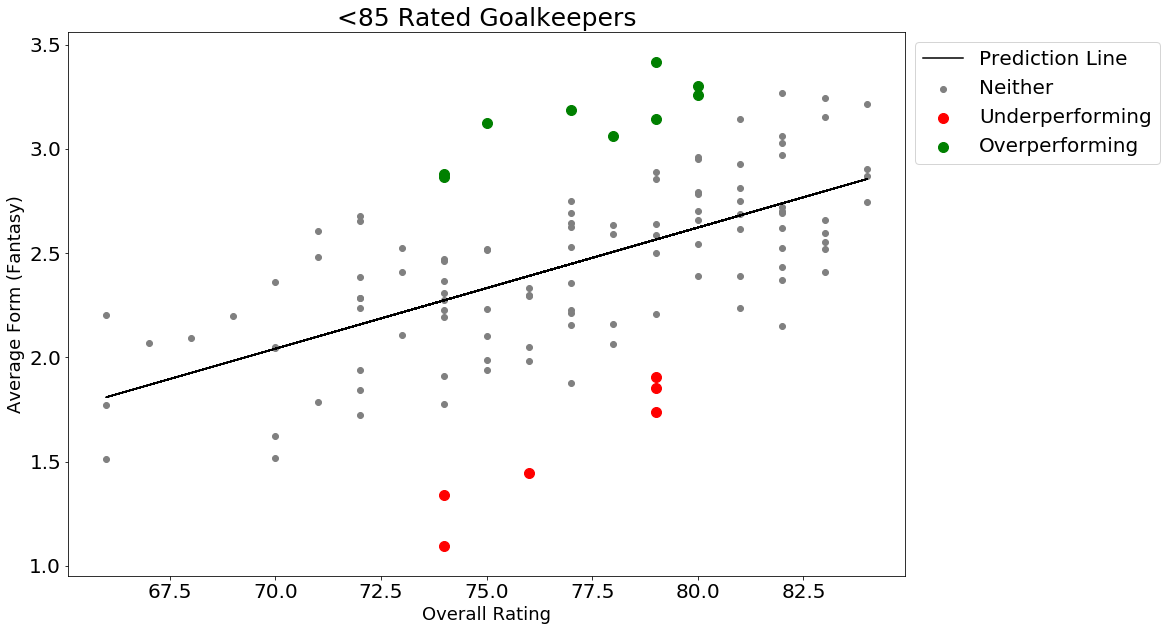

In [701]:
plt.figure(figsize=(15,10)) 
plt.scatter(w, z,color='grey') 
plt.scatter(ag1, ag2,color='red',s=100) 
plt.scatter(ag3, ag4,color='green',s=100) 
plt.plot(w, average_goalkeepers_model.predict(w),color='k') 
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':20},labels=['Prediction Line','Neither','Underperforming','Overperforming'])
plt.title('<85 Rated Goalkeepers', fontsize=25)
plt.xlabel("Overall Rating", fontsize=18)
plt.ylabel("Average Form (Fantasy)", fontsize=18)
plt.show() 

In [702]:
wg1 = underperforming_worldclass_gk['overall'].values[:,np.newaxis] 
wg2 = underperforming_worldclass_gk['Previous Average Form'].values 
wg3 = overperforming_worldclass_gk['overall'].values[:,np.newaxis] 
wg4 = overperforming_worldclass_gk['Previous Average Form'].values

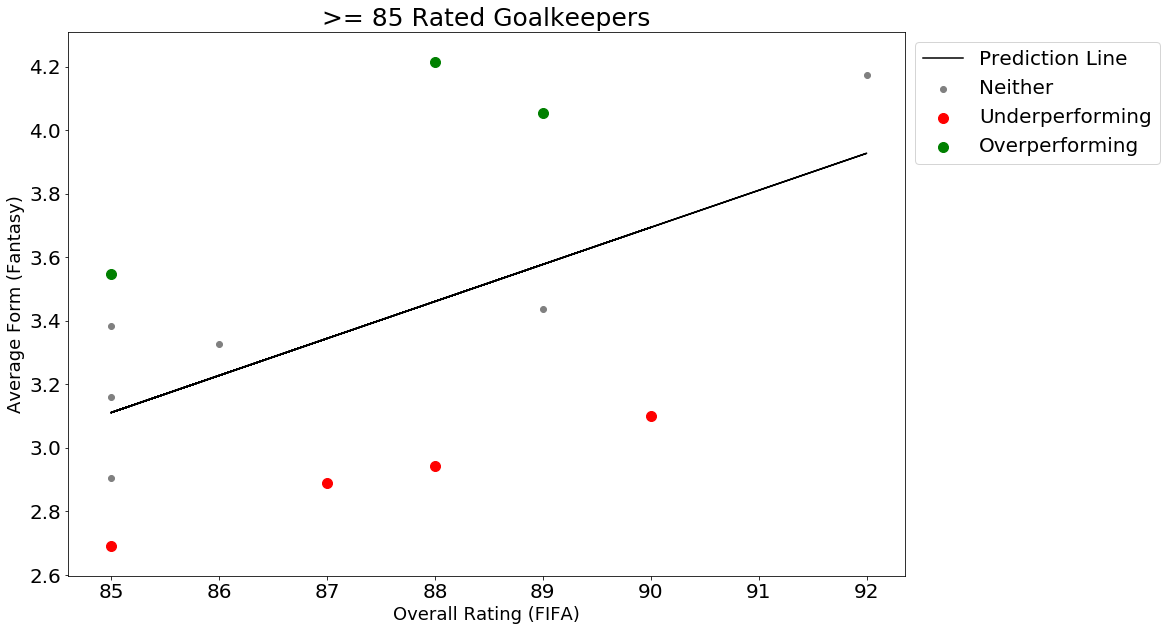

In [703]:
plt.figure(figsize=(15,10)) 
plt.scatter(x, y,color='grey') 
plt.scatter(wg1, wg2,color='red',s=100) 
plt.scatter(wg3, wg4,color='green',s=100) 
plt.plot(x, worldclass_goalkeepers_model.predict(x),color='k') 
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':20},labels=['Prediction Line','Neither','Underperforming','Overperforming'])
plt.title('>= 85 Rated Goalkeepers', fontsize=25) 
plt.xlabel("Overall Rating (FIFA)", fontsize=18)
plt.ylabel("Average Form (Fantasy)", fontsize=18)
plt.show()

## Defenders

In [704]:
RQ1_Defenders = RQ1[RQ1['Position'] == 'Defender']

In [705]:
average_defenders = RQ1_Defenders[RQ1_Defenders['overall']<85]
worldclass_defenders = RQ1_Defenders[RQ1_Defenders['overall']>84]

In [706]:
w = average_defenders['overall'].values[:,np.newaxis]
z = average_defenders['Previous Average Form'].values
average_defenders_model = LinearRegression()
average_defenders_model.fit(w, z)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [707]:
x = worldclass_defenders['overall'].values[:,np.newaxis]
y = worldclass_defenders['Previous Average Form'].values
worldclass_defenders_model = LinearRegression()
worldclass_defenders_model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [708]:
average_defenders["Distance"] = average_defenders['Previous Average Form'].values - average_defenders_model.predict(average_defenders['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [709]:
worldclass_defenders["Distance"] = worldclass_defenders['Previous Average Form'].values - worldclass_defenders_model.predict(worldclass_defenders['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [710]:
pos_dist_def0 = average_defenders[average_defenders['Distance']>=0]['Distance'].mean()
pos_dist_def1 = worldclass_defenders[worldclass_defenders['Distance']>=0]['Distance'].mean()

In [711]:
neg_dist_def0 = average_defenders[average_defenders['Distance']<0]['Distance'].mean()
neg_dist_def1 = worldclass_defenders[worldclass_defenders['Distance']<0]['Distance'].mean()

In [712]:
underperforming_average_def = average_defenders[average_defenders['Distance']<(neg_dist_def0*2)]
underperforming_worldclass_def = worldclass_defenders[worldclass_defenders['Distance']<neg_dist_def1]

In [713]:
overperforming_average_def = average_defenders[average_defenders['Distance']>(pos_dist_def0*2)]
overperforming_worldclass_def = worldclass_defenders[worldclass_defenders['Distance']>pos_dist_def1]

In [714]:
underperforming_average_def['Predicted Form'] = average_defenders_model.predict(underperforming_average_def['overall'].values[:,np.newaxis])
underperforming_worldclass_def['Predicted Form'] = worldclass_defenders_model.predict(underperforming_worldclass_def['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [715]:
overperforming_average_def['Predicted Form'] = average_defenders_model.predict(overperforming_average_def['overall'].values[:,np.newaxis])
overperforming_worldclass_def['Predicted Form'] = worldclass_defenders_model.predict(overperforming_worldclass_def['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [716]:
underperforming_defenders = pd.concat([underperforming_average_def ,underperforming_worldclass_def ],axis=0)

In [717]:
overperforming_defenders = pd.concat([overperforming_average_def ,overperforming_worldclass_def ],axis=0)

In [718]:
ad1 = underperforming_average_def['overall'].values[:,np.newaxis] 
ad2 = underperforming_average_def['Previous Average Form'].values 
ad3 = overperforming_average_def['overall'].values[:,np.newaxis] 
ad4 = overperforming_average_def['Previous Average Form'].values 

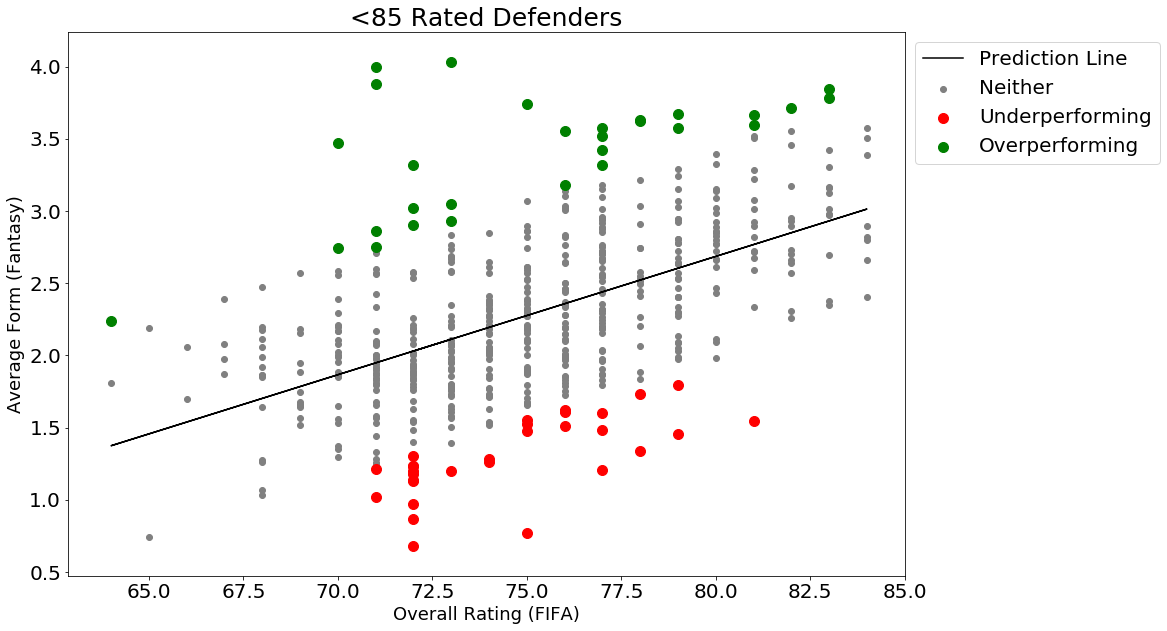

In [719]:
plt.figure(figsize=(15,10)) 
plt.scatter(w, z,color='grey') 
plt.scatter(ad1, ad2,color='red',s=100) 
plt.scatter(ad3, ad4,color='green',s=100) 
plt.plot(w, average_defenders_model.predict(w),color='k') 
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':20},labels=['Prediction Line','Neither','Underperforming','Overperforming'])
plt.title('<85 Rated Defenders', fontsize=25) 
plt.xlabel("Overall Rating (FIFA)", fontsize=18)
plt.ylabel("Average Form (Fantasy)", fontsize=18)
plt.show()

In [720]:
wd1 = underperforming_worldclass_def['overall'].values[:,np.newaxis] 
wd2 = underperforming_worldclass_def['Previous Average Form'].values 
wd3 = overperforming_worldclass_def['overall'].values[:,np.newaxis] 
wd4 = overperforming_worldclass_def['Previous Average Form'].values

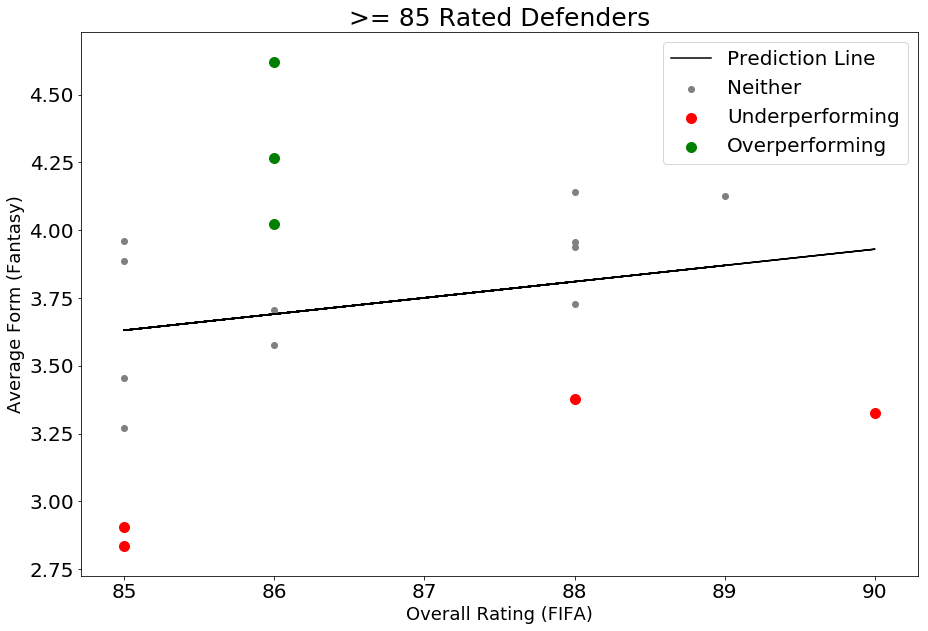

In [721]:
plt.figure(figsize=(15,10)) 
plt.scatter(x, y,color='grey') 
plt.scatter(wd1, wd2,color='red',s=100) 
plt.scatter(wd3, wd4,color='green',s=100) 
plt.plot(x, worldclass_defenders_model.predict(x),color='k') 
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':20},labels=['Prediction Line','Neither','Underperforming','Overperforming'])
plt.title('>= 85 Rated Defenders', fontsize=25) 
plt.xlabel("Overall Rating (FIFA)", fontsize=18)
plt.ylabel("Average Form (Fantasy)", fontsize=18)
plt.show()

## Midfielders

In [722]:
RQ1_Midfielders = RQ1[RQ1['Position'] == 'Midfielder']

In [723]:
average_midfielders = RQ1_Midfielders[RQ1_Midfielders['overall']<85]
worldclass_midfielders = RQ1_Midfielders[RQ1_Midfielders['overall']>84]

In [724]:
w = average_midfielders['overall'].values[:,np.newaxis]
z = average_midfielders['Previous Average Form'].values
average_midfielders_model = LinearRegression()
average_midfielders_model.fit(w, z)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [725]:
x = worldclass_midfielders['overall'].values[:,np.newaxis]
y = worldclass_midfielders['Previous Average Form'].values
worldclass_midfielders_model = LinearRegression()
worldclass_midfielders_model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [726]:
average_midfielders["Distance"] = average_midfielders['Previous Average Form'].values - average_midfielders_model.predict(average_midfielders['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [727]:
worldclass_midfielders["Distance"] = worldclass_midfielders['Previous Average Form'].values - worldclass_midfielders_model.predict(worldclass_midfielders['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [728]:
pos_dist_mid0 = average_midfielders[average_midfielders['Distance']>=0]['Distance'].mean()
pos_dist_mid1 = worldclass_midfielders[worldclass_midfielders['Distance']>=0]['Distance'].mean()

In [729]:
neg_dist_mid0 = average_midfielders[average_midfielders['Distance']<0]['Distance'].mean()
neg_dist_mid1 = worldclass_midfielders[worldclass_midfielders['Distance']<0]['Distance'].mean()

In [730]:
underperforming_average_mid = average_midfielders[average_midfielders['Distance']<(neg_dist_mid0*2)]
underperforming_worldclass_mid = worldclass_midfielders[worldclass_midfielders['Distance']<neg_dist_mid1]

In [731]:
overperforming_average_mid = average_midfielders[average_midfielders['Distance']>(pos_dist_mid0*2)]
overperforming_worldclass_mid = worldclass_midfielders[worldclass_midfielders['Distance']>pos_dist_mid1]

In [732]:
underperforming_average_mid['Predicted Form'] = average_midfielders_model.predict(underperforming_average_mid['overall'].values[:,np.newaxis])
underperforming_worldclass_mid['Predicted Form'] = worldclass_midfielders_model.predict(underperforming_worldclass_mid['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [733]:
overperforming_average_mid['Predicted Form'] = average_midfielders_model.predict(overperforming_average_mid['overall'].values[:,np.newaxis])
overperforming_worldclass_mid['Predicted Form'] = worldclass_midfielders_model.predict(overperforming_worldclass_mid['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [734]:
underperforming_midfielders = pd.concat([underperforming_average_mid ,underperforming_worldclass_mid ],axis=0)

In [735]:
overperforming_midfielders = pd.concat([overperforming_average_mid ,overperforming_worldclass_mid ],axis=0)

In [736]:
am1 = underperforming_average_mid['overall'].values[:,np.newaxis] 
am2 = underperforming_average_mid['Previous Average Form'].values 
am3 = overperforming_average_mid['overall'].values[:,np.newaxis] 
am4 = overperforming_average_mid['Previous Average Form'].values 

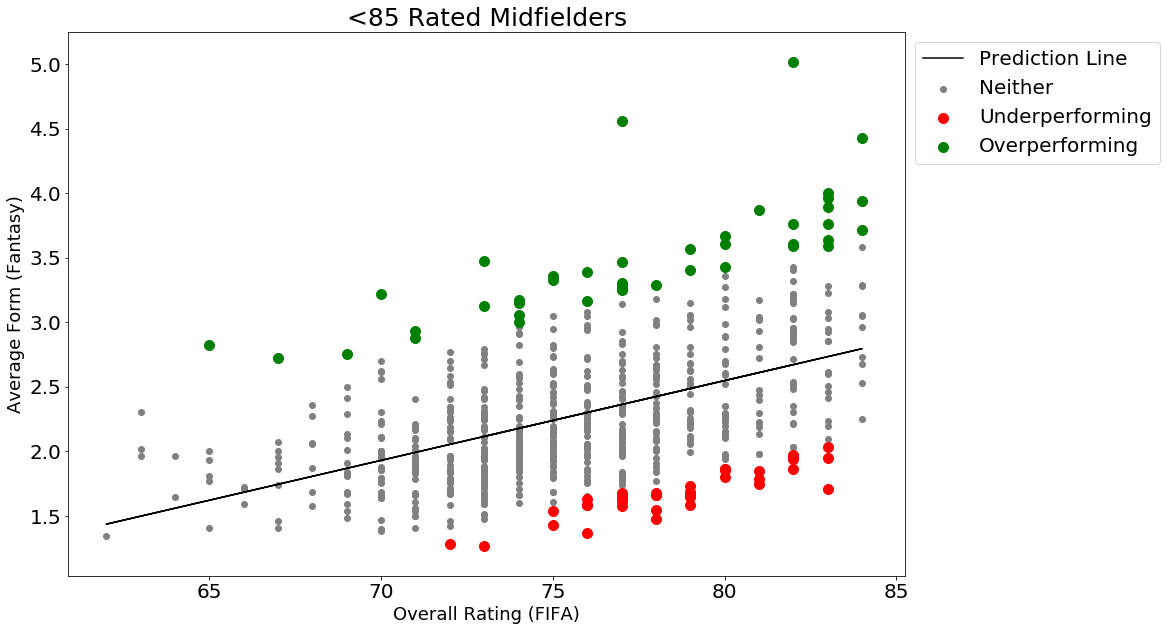

In [737]:
plt.figure(figsize=(15,10)) 
plt.scatter(w, z,color='grey') 
plt.scatter(am1, am2,color='red',s=100) 
plt.scatter(am3, am4,color='green',s=100) 
plt.plot(w, average_midfielders_model.predict(w),color='k') 
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':20},labels=['Prediction Line','Neither','Underperforming','Overperforming'])
plt.title('<85 Rated Midfielders', fontsize=25) 
plt.xlabel("Overall Rating (FIFA)", fontsize=18)
plt.ylabel("Average Form (Fantasy)", fontsize=18)
plt.show() 

In [738]:
wm1 = underperforming_worldclass_mid['overall'].values[:,np.newaxis] 
wm2 = underperforming_worldclass_mid['Previous Average Form'].values 
wm3 = overperforming_worldclass_mid['overall'].values[:,np.newaxis] 
wm4 = overperforming_worldclass_mid['Previous Average Form'].values

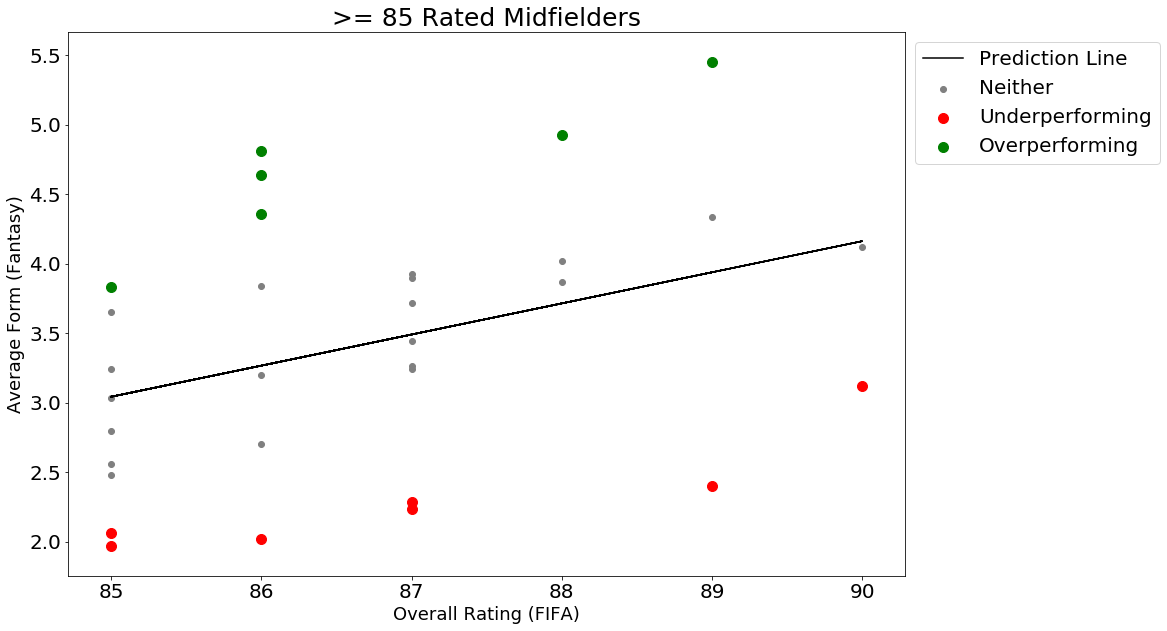

In [739]:
plt.figure(figsize=(15,10)) 
plt.scatter(x, y,color='grey') 
plt.scatter(wm1, wm2,color='red',s=100) 
plt.scatter(wm3, wm4,color='green',s=100) 
plt.plot(x, worldclass_midfielders_model.predict(x),color='k') 
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':20},labels=['Prediction Line','Neither','Underperforming','Overperforming'])
plt.title('>= 85 Rated Midfielders', fontsize=25) 
plt.xlabel("Overall Rating (FIFA)", fontsize=18)
plt.ylabel("Average Form (Fantasy)", fontsize=18)
plt.show()

## Forwards

In [740]:
RQ1_Forwards = RQ1[RQ1['Position'] == 'Forward']

In [741]:
average_forwards = RQ1_Forwards[RQ1_Forwards['overall']<85]
worldclass_forwards = RQ1_Forwards[RQ1_Forwards['overall']>84]

In [742]:
w = average_forwards['overall'].values[:,np.newaxis]
z = average_forwards['Previous Average Form'].values
average_forwards_model = LinearRegression()
average_forwards_model.fit(w, z)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [743]:
x = worldclass_forwards['overall'].values[:,np.newaxis]
y = worldclass_forwards['Previous Average Form'].values
worldclass_forwards_model = LinearRegression()
worldclass_forwards_model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [744]:
average_forwards["Distance"] = average_forwards['Previous Average Form'].values - average_forwards_model.predict(average_forwards['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [745]:
worldclass_forwards["Distance"] = worldclass_forwards['Previous Average Form'].values - worldclass_forwards_model.predict(worldclass_forwards['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [746]:
pos_dist_fwd0 = average_forwards[average_forwards['Distance']>=0]['Distance'].mean()
pos_dist_fwd1 = worldclass_forwards[worldclass_forwards['Distance']>=0]['Distance'].mean()

In [747]:
neg_dist_fwd0 = average_forwards[average_forwards['Distance']<0]['Distance'].mean()
neg_dist_fwd1 = worldclass_forwards[worldclass_forwards['Distance']<0]['Distance'].mean()

In [748]:
underperforming_average_fwd = average_forwards[average_forwards['Distance']<(neg_dist_mid0*2)]
underperforming_worldclass_fwd = worldclass_forwards[worldclass_forwards['Distance']<neg_dist_mid1]

In [749]:
overperforming_average_fwd = average_forwards[average_forwards['Distance']>(pos_dist_mid0*2)]
overperforming_worldclass_fwd = worldclass_forwards[worldclass_forwards['Distance']>pos_dist_mid1]

In [750]:
underperforming_average_fwd['Predicted Form'] = average_forwards_model.predict(underperforming_average_fwd['overall'].values[:,np.newaxis])
underperforming_worldclass_fwd['Predicted Form'] = worldclass_forwards_model.predict(underperforming_worldclass_fwd['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [751]:
overperforming_average_fwd['Predicted Form'] = average_forwards_model.predict(overperforming_average_fwd['overall'].values[:,np.newaxis])
overperforming_worldclass_fwd['Predicted Form'] = worldclass_forwards_model.predict(overperforming_worldclass_fwd['overall'].values[:,np.newaxis])

C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mark\Desktop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [752]:
underperforming_forwards = pd.concat([underperforming_average_fwd ,underperforming_worldclass_fwd ],axis=0)

In [753]:
overperforming_forwards = pd.concat([overperforming_average_fwd ,overperforming_worldclass_fwd ],axis=0)

In [754]:
af1 = underperforming_average_fwd['overall'].values[:,np.newaxis] 
af2 = underperforming_average_fwd['Previous Average Form'].values 
af3 = overperforming_average_fwd['overall'].values[:,np.newaxis] 
af4 = overperforming_average_fwd['Previous Average Form'].values 

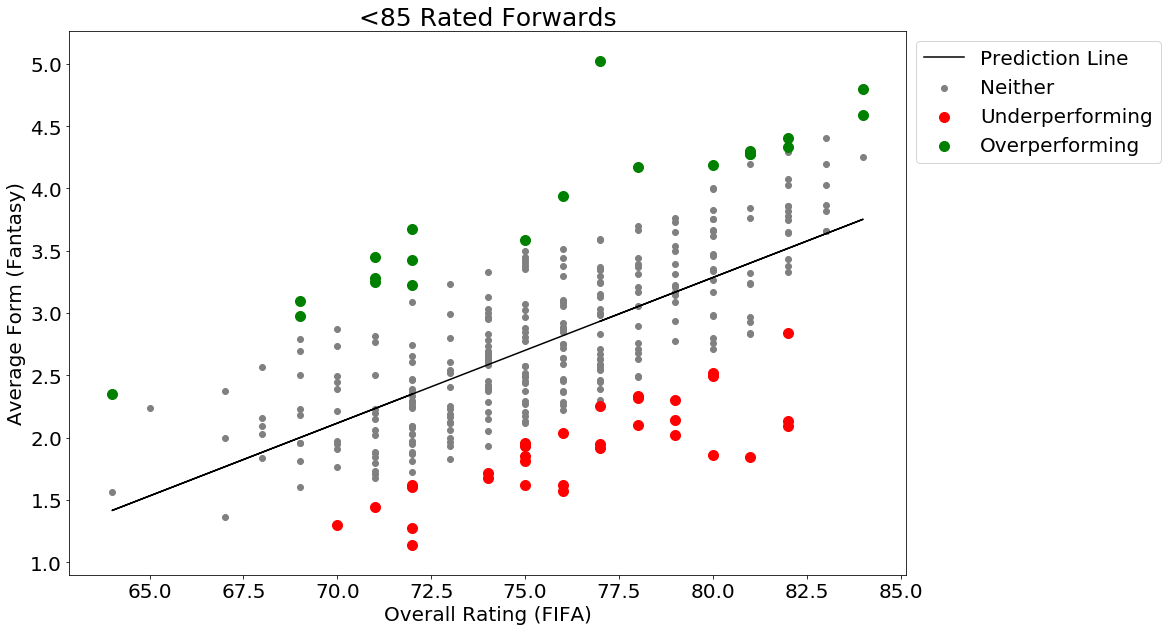

In [755]:
plt.figure(figsize=(15,10))
plt.scatter(w, z,color='grey') 
plt.scatter(af1, af2,color='red',s=100) 
plt.scatter(af3, af4,color='green',s=100) 
plt.plot(w, average_forwards_model.predict(w),color='k') 
plt.title('<85 Rated Forwards', fontsize=25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':20},labels=['Prediction Line','Neither','Underperforming','Overperforming'])
plt.xlabel("Overall Rating (FIFA)", fontsize=20)
plt.ylabel("Average Form (Fantasy)", fontsize=20)
plt.savefig('../../data/analysis/Average Forwards.png')
plt.show() 

In [756]:
wf1 = underperforming_worldclass_fwd['overall'].values[:,np.newaxis] 
wf2 = underperforming_worldclass_fwd['Previous Average Form'].values 
wf3 = overperforming_worldclass_fwd['overall'].values[:,np.newaxis] 
wf4 = overperforming_worldclass_fwd['Previous Average Form'].values

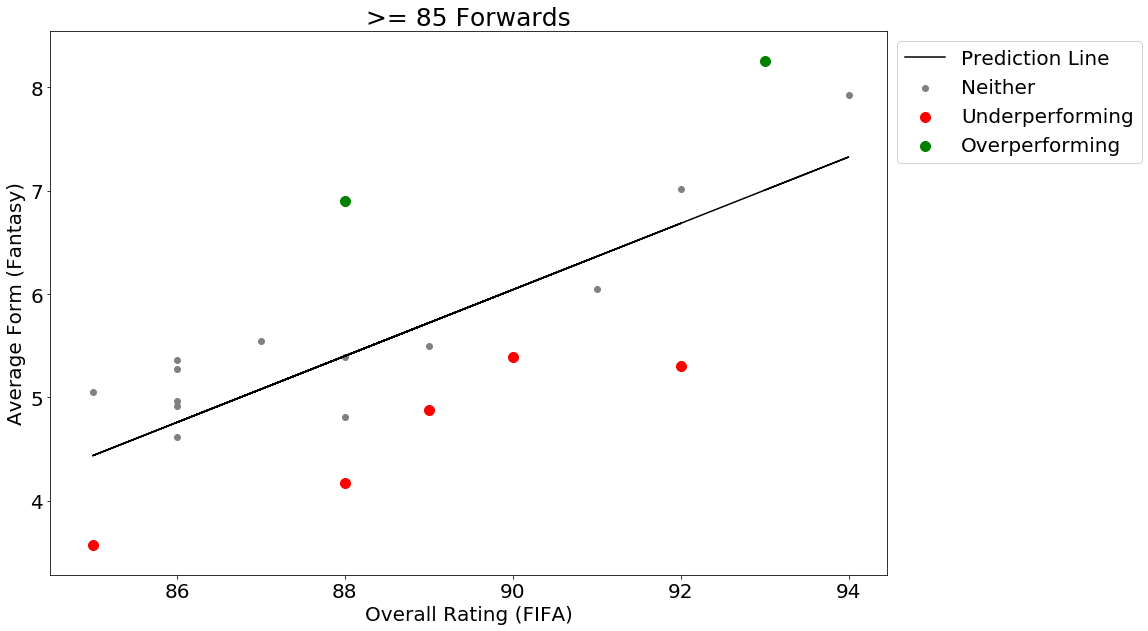

In [757]:
plt.figure(figsize=(15,10)) 
plt.scatter(x, y,color='grey') 
plt.scatter(wf1, wf2,color='red',s=100) 
plt.scatter(wf3, wf4,color='green',s=100) 
plt.plot(x, worldclass_forwards_model.predict(x),color='k') 
plt.title('>= 85 Forwards', fontsize=25) 
plt.xticks(fontsize = 20)
plt.xlabel("Overall Rating (FIFA)", fontsize=20)
plt.yticks(fontsize = 20)
plt.ylabel("Average Form (Fantasy)", fontsize=20)
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':20},labels=['Prediction Line','Neither','Underperforming','Overperforming'])
plt.savefig('../../data/analysis/World Class Forwards.png')
plt.show()

## Overrated Players

In [758]:
underperforming_players = pd.concat([underperforming_goalkeepers,underperforming_defenders,underperforming_midfielders,underperforming_forwards], axis=0).reset_index().drop('index',1)

In [759]:
underperforming_players = underperforming_players[underperforming_players['Apps This Season']>0]

In [760]:
underperforming_players['FIFA Rating Distance'] = abs(underperforming_players['Current Average Form'] - underperforming_players['Predicted Form'])
underperforming_players['Previous Form Distance'] = abs(underperforming_players['Current Average Form'] - underperforming_players['Previous Average Form'])
underperforming_players['Difference'] = abs(underperforming_players['FIFA Rating Distance'] - underperforming_players['Previous Form Distance'])

In [761]:
underperforming_players.loc[underperforming_players['FIFA Rating Distance']<underperforming_players['Previous Form Distance'],'Verdict'] = 'Underperforming'
underperforming_players.loc[underperforming_players['FIFA Rating Distance']>underperforming_players['Previous Form Distance'],'Verdict'] = 'Overrated'
underperforming_players.loc[underperforming_players['FIFA Rating Distance'] == underperforming_players['Previous Form Distance'],'Verdict'] = 'Equal'

In [762]:
x = underperforming_players['Verdict'].value_counts()

Text(0,0.5,'')

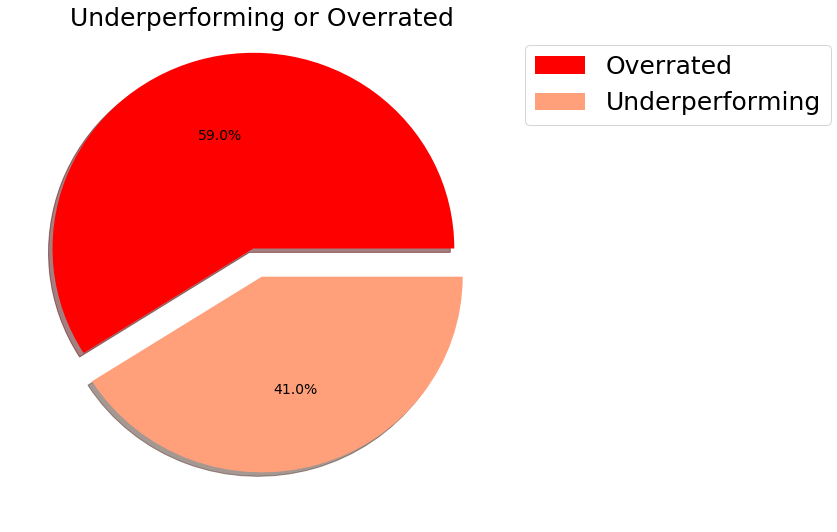

In [843]:
explode = (0.15, 0)
labels = ['','']
x.plot(subplots=True,kind='pie',figsize=(9,9),fontsize=14,explode=explode,autopct='%1.1f%%',shadow=True,labels=labels,colors=['r','lightsalmon'],labeldistance=1.4)
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':25},labels=x.index)
plt.gca().set_title('',color='white')
plt.title('Underperforming or Overrated',fontsize=25,color='Black')
plt.ylabel('')

In [764]:
overrated_players = underperforming_players[underperforming_players['Verdict']=='Overrated']
overrated_players = overrated_players.sort_values('Difference', ascending=False).reset_index().drop('index',1)

In [842]:
overrated_players.head(10)[['Players','Position','club','overall','Predicted Form','Previous Average Form','Current Average Form','Difference']]

,Players,Position,club,overall,Predicted Form,Previous Average Form,Current Average Form,Difference
0,Manu Trigueros,Forward,Villarreal CF,82,3.518352,2.094891,2.129032,1.355178
1,Marco Verratti,Midfielder,Paris Saint-Germain,87,3.489731,2.231343,1.909091,1.258388
2,N'Golo Kante,Midfielder,Chelsea,87,3.489731,2.284404,2.161290,1.205328
3,Luka Modric,Midfielder,Real Madrid CF,89,3.937332,2.400000,2.608696,1.119941
4,Erik Moran,Forward,CD Leganes,72,2.349742,1.275862,1.000000,1.073880
5,Jorge Mere,Defender,1. FC Koln,78,2.522151,1.339286,1.428571,1.004294
6,Muhamed Besic,Midfielder,Everton,76,2.302002,1.371429,1.000000,0.930574
7,Nordin Amrabat,Forward,CD Leganes,79,3.167769,2.300000,2.000000,0.867769
8,Tobias Strobl,Defender,Borussia Monchengladbach,76,2.358253,1.513761,0.333333,0.844491
9,Alexis Sanchez,Forward,Arsenal,89,5.720774,4.879518,3.862069,0.841256


## Underrated Players

In [766]:
overperforming_players = pd.concat([overperforming_goalkeepers,overperforming_defenders,overperforming_midfielders,overperforming_forwards], axis=0).reset_index().drop('index',1)

In [767]:
overperforming_players = overperforming_players[overperforming_players['Apps This Season']>0]

In [768]:
overperforming_players['FIFA Rating Distance'] = abs(overperforming_players['Current Average Form'] - overperforming_players['Predicted Form'])
overperforming_players['Previous Form Distance'] = abs(overperforming_players['Current Average Form'] - overperforming_players['Previous Average Form'])
overperforming_players['Difference'] = abs(overperforming_players['FIFA Rating Distance'] - overperforming_players['Previous Form Distance'])

In [769]:
overperforming_players.loc[overperforming_players['FIFA Rating Distance']<overperforming_players['Previous Form Distance'],'Verdict'] = 'Overperforming'
overperforming_players.loc[overperforming_players['FIFA Rating Distance']>overperforming_players['Previous Form Distance'],'Verdict'] = 'Underrated'
overperforming_players.loc[overperforming_players['FIFA Rating Distance'] == overperforming_players['Previous Form Distance'],'Verdict'] = 'Equal'

In [770]:
y = overperforming_players['Verdict'].value_counts()

Text(0,0.5,'')

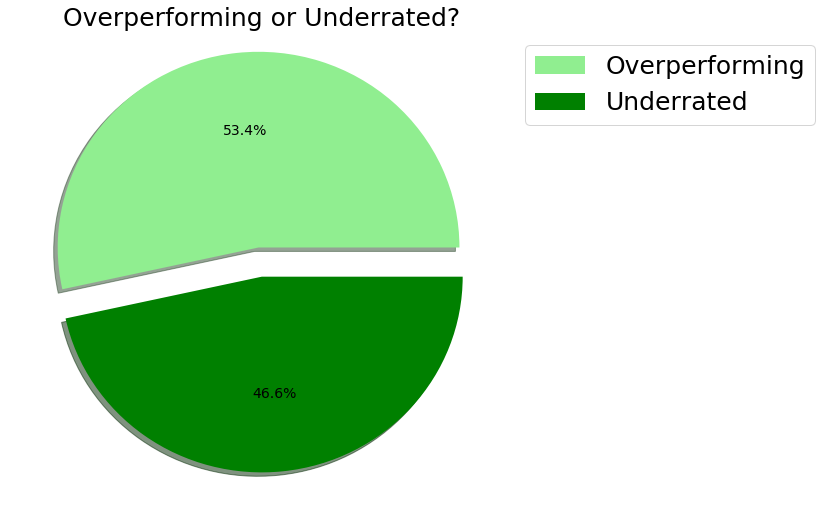

In [839]:
explode = (0.15, 0)
labels = ['','']
y.plot(subplots=True,kind='pie',figsize=(9,9),fontsize=14,explode=explode,autopct='%1.1f%%',shadow=True,labels=labels,colors=['lightgreen','green'],labeldistance=1.4)
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':25},labels=y.index)
plt.gca().set_title('',color='white',fontsize=30)
plt.title('Overperforming or Underrated?',fontsize=25,color='Black')
plt.ylabel('')

In [772]:
underrated_players = overperforming_players[overperforming_players['Verdict']=='Underrated']
underrated_players = underrated_players.sort_values('Difference', ascending=False).reset_index().drop('index',1)

In [841]:
underrated_players.head(10)[['Players','Position','club','overall','Predicted Form','Previous Average Form','Current Average Form','Difference']]

,Players,Position,club,overall,Predicted Form,Previous Average Form,Current Average Form,Difference
0,Marco Reus,Midfielder,Borussia Dortmund,86,3.265931,4.806452,5.111111,1.540520
1,Junior Stanislas,Midfielder,Bournemouth,73,2.116653,3.476190,3.473684,1.354525
2,Roberto Firmino,Midfielder,Liverpool,83,2.734483,3.890909,4.571429,1.156426
3,Sadio Mane,Midfielder,Liverpool,84,2.796266,3.936170,4.370370,1.139904
4,Lucas Hernandez,Defender,Atletico Madrid,77,2.440202,3.576923,4.400000,1.136721
5,Nabil Fekir,Midfielder,Olympique Lyonnais,82,2.672700,3.764706,5.481481,1.092006
6,James Rodriguez,Midfielder,FC Bayern Munich,86,3.265931,4.357143,4.428571,1.091212
7,Dele Alli,Midfielder,Tottenham Hotspur,84,2.796266,4.428571,4.156250,1.087663
8,Mauro Icardi,Forward,Inter,84,3.752074,4.793548,6.483871,1.041475
9,Anthony Martial,Midfielder,Manchester United,82,2.672700,3.593220,3.620690,0.920520


## Reasons for players being over/underrated 

In [774]:
underrated_goalkeepers = underrated_players[underrated_players['Position'] == 'Goalkeeper']
underrated_defenders = underrated_players[underrated_players['Position'] == 'Defender']
underrated_midfielders = underrated_players[underrated_players['Position'] == 'Midfielder']
underrated_forwards = underrated_players[underrated_players['Position'] == 'Forward']

In [775]:
overrated_goalkeepers = overrated_players[overrated_players['Position'] == 'Goalkeeper']
overrated_defenders = overrated_players[overrated_players['Position'] == 'Defender']
overrated_midfielders = overrated_players[overrated_players['Position'] == 'Midfielder']
overrated_forwards = overrated_players[overrated_players['Position'] == 'Forward']

#### 1. Age

In [776]:
age = pd.DataFrame(columns = ['Average Age'])
age.set_value('All Players','Average Age',RQ1.mean()['age'])
age.set_value('Overrated Players','Average Age',overrated_players.mean()['age'])
age.set_value('Underrated Players','Average Age',underrated_players.mean()['age'])

,Average Age
All Players,27.914
Overrated Players,25.8913
Underrated Players,26.5588


#### 2. Apps

In [777]:
apps = pd.DataFrame(columns = ["All Players","Underrated Players", "Overrated Players"])
apps.set_value('Average Apps/Season','All Players',RQ1.mean()['Average Apps/Season'])
apps.set_value('Average Apps/Season','Underrated Players',underrated_players.mean()['Average Apps/Season'])
apps.set_value('Average Apps/Season','Overrated Players',overrated_players.mean()['Average Apps/Season'])
apps.set_value('Apps This Season','All Players',RQ1.mean()['Apps This Season'])
apps.set_value('Apps This Season','Underrated Players',underrated_players.mean()['Apps This Season'])
apps.set_value('Apps This Season','Overrated Players',overrated_players.mean()['Apps This Season'])

,All Players,Underrated Players,Overrated Players
Average Apps/Season,29.0289,28.6789,30.6105
Apps This Season,14.2808,25.8235,21.7174


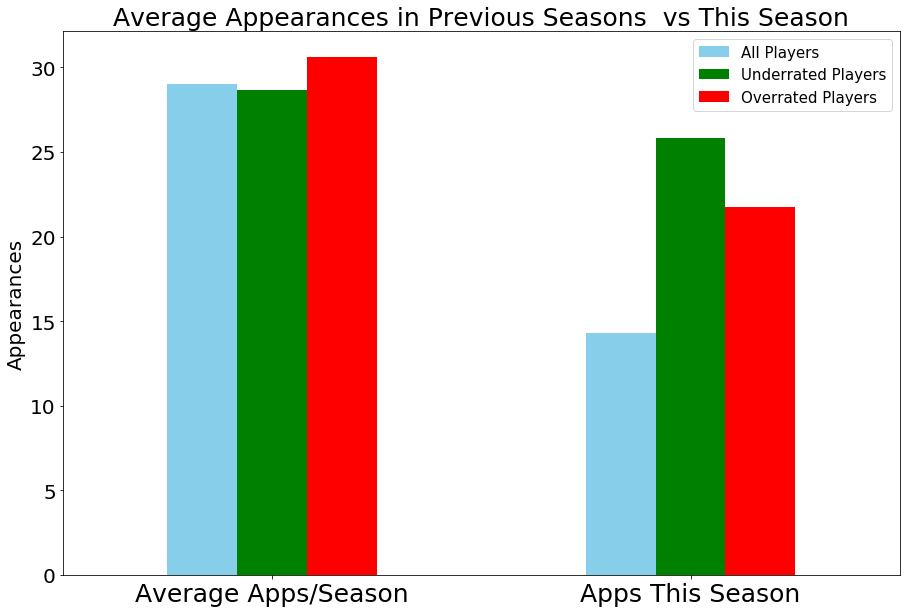

In [840]:
colors = ['skyblue','green','r']
ax = apps.plot(kind='bar', figsize=(15, 10), legend=True, fontsize=12,color=colors)
ax.set_title("Average Appearances in Previous Seasons  vs This Season",size=25)
ax.set_xlabel("")
ax.set_ylabel("Appearances", fontsize=20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.setp(ax.get_xticklabels(), rotation='horizontal', fontsize=25)
plt.show()

#### 3. Position

In [779]:
position_overperforming = overperforming_players.groupby('Position').count().sort_values('Players', ascending=False)['Players']
position_overperforming 

Position
Midfielder    33
Defender      20
Forward       11
Goalkeeper     9
Name: Players, dtype: int64

In [780]:
position_underrated = underrated_players.groupby('Position').count().sort_values('Players', ascending=False)['Players']
position_underrated = position_underrated.reindex(['Midfielder','Defender','Forward','Goalkeeper'])
position_underrated

Position
Midfielder    17
Defender       9
Forward        3
Goalkeeper     5
Name: Players, dtype: int64

In [781]:
position_underrated = np.where(np.isnan(position_underrated), 0, position_underrated)

In [782]:
underated_difference = position_overperforming  - position_underrated
underated_difference

Position
Midfielder    16
Defender      11
Forward        8
Goalkeeper     4
Name: Players, dtype: int64

In [783]:
underated_percentage = (position_underrated/position_overperforming)*100
underated_percentage.round(2).to_frame()

,Players
Position,
Midfielder,51.52
Defender,45.00
Forward,27.27
Goalkeeper,55.56


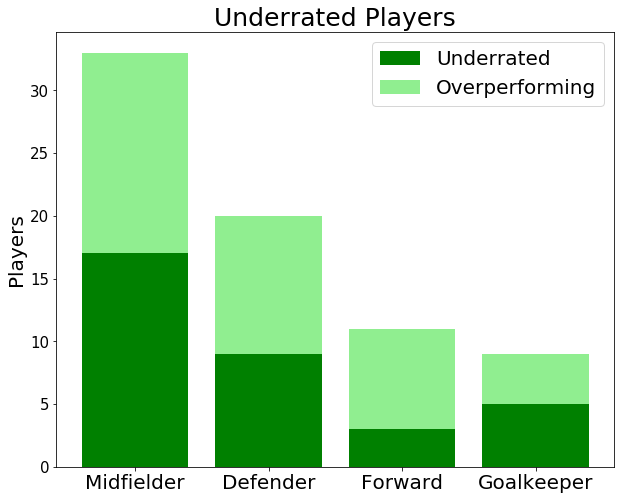

In [832]:
X = range(4)
labels_order = [0,1,2,3]
positions_labels = ['Midfielder', 'Defender', 'Forward','Goalkeeper']

plt.figure(figsize=(10,8))
plt.bar(X, position_underrated, color = 'g')
plt.bar(X, underated_difference, color = 'lightgreen', bottom = position_underrated)
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':20},labels=['Underrated','Overperforming'])
plt.title('Underrated Players', fontsize=25)
plt.xticks(labels_order, positions_labels, fontsize=20)
plt.ylabel('Players', fontsize=20)

plt.show()

In [785]:
position_underperforming = underperforming_players.groupby('Position').count().sort_values('Players', ascending=False)['Players']
position_underperforming 

Position
Midfielder    32
Defender      21
Forward       19
Goalkeeper     6
Name: Players, dtype: int64

In [786]:
position_overrated = overrated_players.groupby('Position').count().sort_values('Players', ascending=False)['Players']
position_overrated = position_overrated.reindex(['Midfielder','Defender','Forward','Goalkeeper'])
position_overrated

Position
Midfielder    25.0
Defender       8.0
Forward       13.0
Goalkeeper     NaN
Name: Players, dtype: float64

In [787]:
position_overrated = np.where(np.isnan(position_overrated), 0, position_overrated)

In [788]:
overrated_difference = position_underperforming - position_overrated
overrated_difference

Position
Midfielder     7.0
Defender      13.0
Forward        6.0
Goalkeeper     6.0
Name: Players, dtype: float64

In [836]:
overated_percentage = (position_overrated/position_underperforming)*100
overated_percentage.round(2).to_frame()

,Players
Position,
Midfielder,78.12
Defender,38.10
Forward,68.42
Goalkeeper,0.00


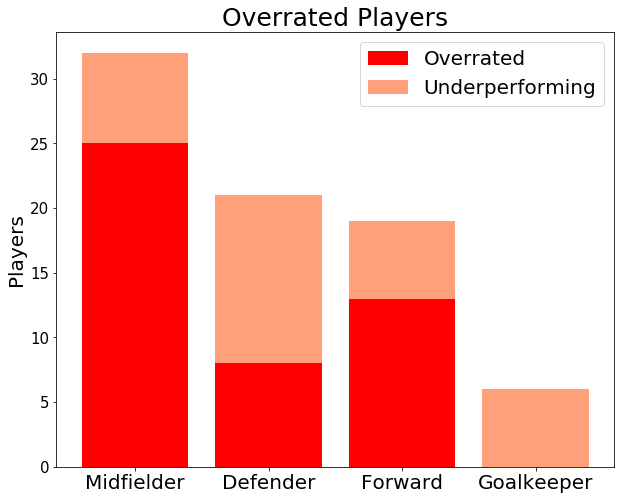

In [833]:
X = range(4)
labels_order = [0,1,2,3]
positions_labels = ['Midfielder', 'Defender', 'Forward','Goalkeeper']

plt.figure(figsize=(10,8))
plt.bar(X, position_overrated, color = 'r')
plt.bar(X, overrated_difference, color = 'lightsalmon', bottom = position_overrated)
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':20},labels=['Overrated','Underperforming'])
plt.title('Overrated Players', fontsize=25)
plt.xticks(labels_order, positions_labels, fontsize=20)
plt.ylabel('Players', fontsize=20)

plt.show()

### 4. league

In [791]:
league_overperforming = overperforming_players.groupby('league').count().sort_values('Players', ascending=False)['Players']
league_overperforming 

league
English Premier League      18
French Ligue 1              18
German Bundesliga           14
Italian Serie A             14
Spanish Primera Division     9
Name: Players, dtype: int64

In [792]:
league_underrated = underrated_players.groupby('league').count().sort_values('Players', ascending=False)['Players']
league_underrated = league_underrated.reindex(['English Premier League','French Ligue 1','German Bundesliga','Italian Serie A','Spanish Primera Division'])
league_underrated

league
English Premier League      7
French Ligue 1              9
German Bundesliga           6
Italian Serie A             8
Spanish Primera Division    4
Name: Players, dtype: int64

In [793]:
league_underrated = np.where(np.isnan(league_underrated), 0, league_underrated)

In [794]:
underrated_difference1 = league_overperforming - league_underrated
underrated_difference1

league
English Premier League      11
French Ligue 1               9
German Bundesliga            8
Italian Serie A              6
Spanish Primera Division     5
Name: Players, dtype: int64

In [795]:
underated_percentage1 = (league_underrated/league_overperforming)*100
underated_percentage1.round(2).to_frame()

,Players
league,
English Premier League,38.89
French Ligue 1,50.00
German Bundesliga,42.86
Italian Serie A,57.14
Spanish Primera Division,44.44


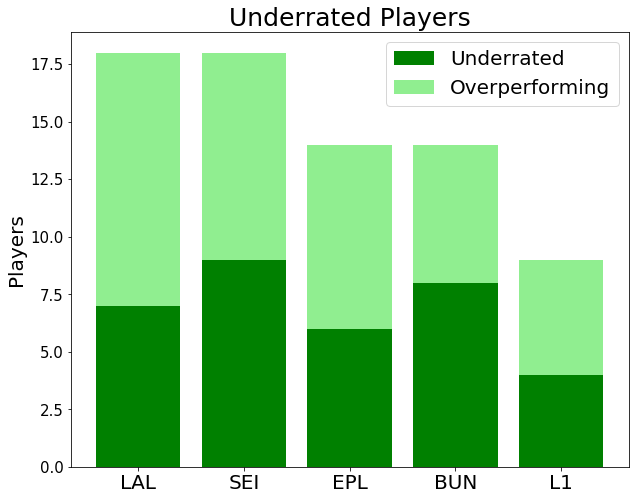

In [834]:
X = range(5)
labels_order = [0,1,2,3,4]
positions_labels = ['LAL','SEI','EPL','BUN' , 'L1']

plt.figure(figsize=(10,8))
plt.bar(X, league_underrated, color = 'g')
plt.bar(X, underrated_difference1, color = 'lightgreen', bottom = league_underrated)
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':20},labels=['Underrated','Overperforming'])
plt.title('Underrated Players', fontsize=25)
plt.xticks(labels_order, positions_labels, fontsize=20)
plt.ylabel('Players', fontsize=20)

plt.show()

In [797]:
league_underperforming = underperforming_players.groupby('league').count().sort_values('Players', ascending=False)['Players']
league_underperforming 

league
Spanish Primera Division    28
Italian Serie A             16
English Premier League      15
German Bundesliga           15
French Ligue 1               4
Name: Players, dtype: int64

In [798]:
league_overrated = overrated_players.groupby('league').count().sort_values('Players', ascending=False)['Players']
league_overrated = league_overrated.reindex(['Spanish Primera Division','Italian Serie A','English Premier League','German Bundesliga' , 'French Ligue 1'])
league_overrated

league
Spanish Primera Division    20
Italian Serie A              6
English Premier League      10
German Bundesliga            8
French Ligue 1               2
Name: Players, dtype: int64

In [799]:
league_overrated = np.where(np.isnan(league_overrated), 0, league_overrated)

In [800]:
overrated_difference1 = league_underperforming - league_overrated
overrated_difference1

league
Spanish Primera Division     8
Italian Serie A             10
English Premier League       5
German Bundesliga            7
French Ligue 1               2
Name: Players, dtype: int64

In [801]:
overated_percentage1 = (league_overrated/league_underperforming)*100
overated_percentage1.round(2).to_frame()

,Players
league,
Spanish Primera Division,71.43
Italian Serie A,37.50
English Premier League,66.67
German Bundesliga,53.33
French Ligue 1,50.00


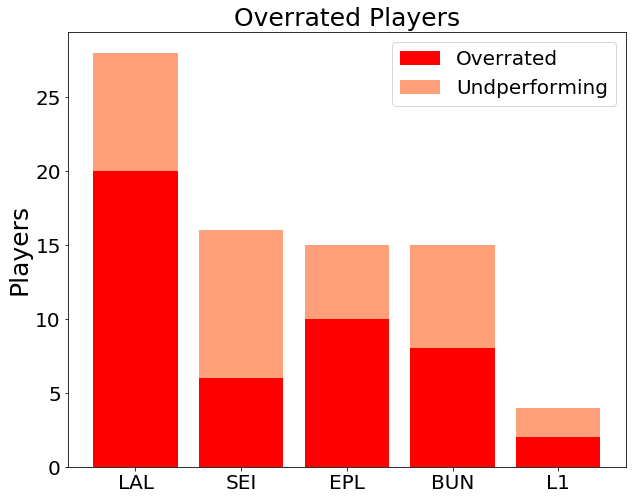

In [837]:
X = range(5)
labels_order = [0,1,2,3,4]
positions_labels = ['LAL','SEI','EPL','BUN' , 'L1']

plt.figure(figsize=(10,8))
plt.bar(X, league_overrated, color = 'r')
plt.bar(X, overrated_difference1, color = 'lightsalmon', bottom = league_overrated)
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':20},labels=['Overrated','Undperforming'])
plt.title('Overrated Players', fontsize=25)
plt.xticks(labels_order, positions_labels, fontsize=20)
plt.ylabel('Players', fontsize=25)
plt.yticks(fontsize=20)

plt.show()

#### 5. Injury Prone

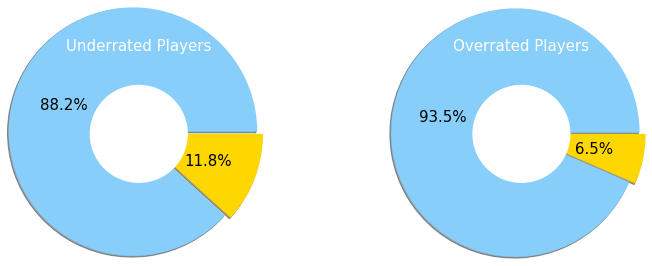

In [803]:
mpl.rcParams['font.size'] = 15
the_grid = GridSpec(6,6)

RQ1['injury_prone_trait'].plot(figsize=(20,20))

plt.subplot(the_grid[4,2], aspect=1)
explode2 = (0.1, 0)
plt.pie(underrated_players['injury_prone_trait'].value_counts(),labels=['',''],labeldistance=1.2,startangle=0,autopct='%.1f%%',shadow=True, radius=2,colors=['lightskyblue','gold'],explode=explode2)
plt.gca().set_title('Underrated Players',color='white',fontsize=15)
centre_circle = plt.Circle((0,0),0.79,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.subplot(the_grid[4, 4], aspect=1)
explode2 = (0.1, 0)
plt.pie(overrated_players['injury_prone_trait'].value_counts(),labels=['',''],labeldistance=1.2,startangle=0,autopct='%.1f%%',shadow=True, radius=2,colors=['lightskyblue','gold'],explode=explode2)
plt.gca().set_title('Overrated Players',color='white',fontsize=15)
centre_circle = plt.Circle((0,0),0.79,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Under/Overrated XI's


In [804]:
underrated_goalkeepers = underrated_players[underrated_players['Position']=='Goalkeeper']
underrated_defenders = underrated_players[underrated_players['Position']=='Defender']
underrated_midfielders = underrated_players[underrated_players['Position']=='Midfielder']
underrated_forwards = underrated_players[underrated_players['Position']=='Forward']

In [805]:
underrated_goalkeepers = underrated_goalkeepers.sort_values('Difference',ascending=False)
underrated_goalkeeper = underrated_goalkeepers.head(1)

underrated_defenders = underrated_defenders.sort_values('Difference',ascending=False)
underrated_defender = underrated_defenders.head(4)


underrated_midfielders = underrated_midfielders.sort_values('Difference',ascending=False)
underrated_midfielder = underrated_midfielders.head(4)


underrated_forwards = underrated_forwards.sort_values('Difference',ascending=False)
underrated_forward = underrated_forwards.head(2)

underrated_XI= pd.concat([underrated_goalkeeper,underrated_defender,underrated_midfielder,underrated_forward])

In [806]:
underrated_XI['photo'] = underrated_XI['photo'].replace('/18/','/1x/18/', regex=True)
underrated_XI = underrated_XI.reset_index()
underrated_XI['Predicted Form'] = underrated_XI['Predicted Form'].round(2)
underrated_XI['Predicted Form'] = underrated_XI['Predicted Form'].astype(str)
Squad_Rating = underrated_XI['overall'].sum()/11
Squad_Rating = str(Squad_Rating)

In [807]:
underrated_XI.round(2)

,index,Players,Position,club,league,age,nationality,overall,photo,injury_prone_trait,...,Average Apps/Season,Previous Average Form,Apps This Season,Current Average Form,Distance,Predicted Form,FIFA Rating Distance,Previous Form Distance,Difference,Verdict
0,19,Jan Oblak,Goalkeeper,Atletico Madrid,Spanish Primera Division,24,Slovenia,88,https://cdn.sofifa.org/1x/18/players/200389.png,False,...,26.33,4.22,34.0,4.59,0.75,3.46,1.13,0.37,0.75,Underrated
1,4,Lucas Hernandez,Defender,Atletico Madrid,Spanish Primera Division,21,France,77,https://cdn.sofifa.org/1x/18/players/220814.png,False,...,8.67,3.58,25.0,4.40,1.14,2.44,1.96,0.82,1.14,Underrated
2,16,Fabinho,Defender,AS Monaco,French Ligue 1,23,Brazil,83,https://cdn.sofifa.org/1x/18/players/209499.png,False,...,33.75,3.79,32.0,3.84,0.85,2.93,0.91,0.06,0.85,Underrated
3,17,Issa Cissokho,Defender,Amiens SC Football,French Ligue 1,32,Senegal,71,https://cdn.sofifa.org/1x/18/players/138704.png,False,...,23.00,2.86,17.0,2.82,0.91,1.95,0.88,0.04,0.84,Underrated
4,20,Jose Maria Gimenez,Defender,Atletico Madrid,Spanish Primera Division,22,Uruguay,83,https://cdn.sofifa.org/1x/18/players/216460.png,False,...,16.00,3.84,21.0,3.76,0.91,2.93,0.83,0.08,0.75,Underrated
5,0,Marco Reus,Midfielder,Borussia Dortmund,German Bundesliga,28,Germany,86,https://cdn.sofifa.org/1x/18/players/188350.png,True,...,31.00,4.81,9.0,5.11,1.54,3.27,1.85,0.30,1.54,Underrated
6,1,Junior Stanislas,Midfielder,Bournemouth,English Premier League,27,England,73,https://cdn.sofifa.org/1x/18/players/189446.png,False,...,21.00,3.48,19.0,3.47,1.36,2.12,1.36,0.00,1.35,Underrated
7,2,Roberto Firmino,Midfielder,Liverpool,English Premier League,25,Brazil,83,https://cdn.sofifa.org/1x/18/players/201942.png,False,...,41.25,3.89,35.0,4.57,1.16,2.73,1.84,0.68,1.16,Underrated
8,3,Sadio Mane,Midfielder,Liverpool,English Premier League,25,Senegal,84,https://cdn.sofifa.org/1x/18/players/208722.png,False,...,31.33,3.94,27.0,4.37,1.14,2.8,1.57,0.43,1.14,Underrated
9,8,Mauro Icardi,Forward,Inter,Italian Serie A,24,Argentina,84,https://cdn.sofifa.org/1x/18/players/201399.png,False,...,38.75,4.79,31.0,6.48,1.04,3.75,2.73,1.69,1.04,Underrated


In [808]:
JoinedUnderratedImages = underrated_XI['photo'].as_matrix() 
GK1 = mpimg.imread(JoinedUnderratedImages [0]) 
DF1 = mpimg.imread(JoinedUnderratedImages [1]) 
DF2 = mpimg.imread(JoinedUnderratedImages [2]) 
DF3 = mpimg.imread(JoinedUnderratedImages [3]) 
DF4 = mpimg.imread(JoinedUnderratedImages [4]) 
MD1 = mpimg.imread(JoinedUnderratedImages [5]) 
MD2 = mpimg.imread(JoinedUnderratedImages [6]) 
MD3 = mpimg.imread(JoinedUnderratedImages [7]) 
MD4 = mpimg.imread(JoinedUnderratedImages [8]) 
FW1 = mpimg.imread(JoinedUnderratedImages [9]) 
FW2 = mpimg.imread(JoinedUnderratedImages [10])

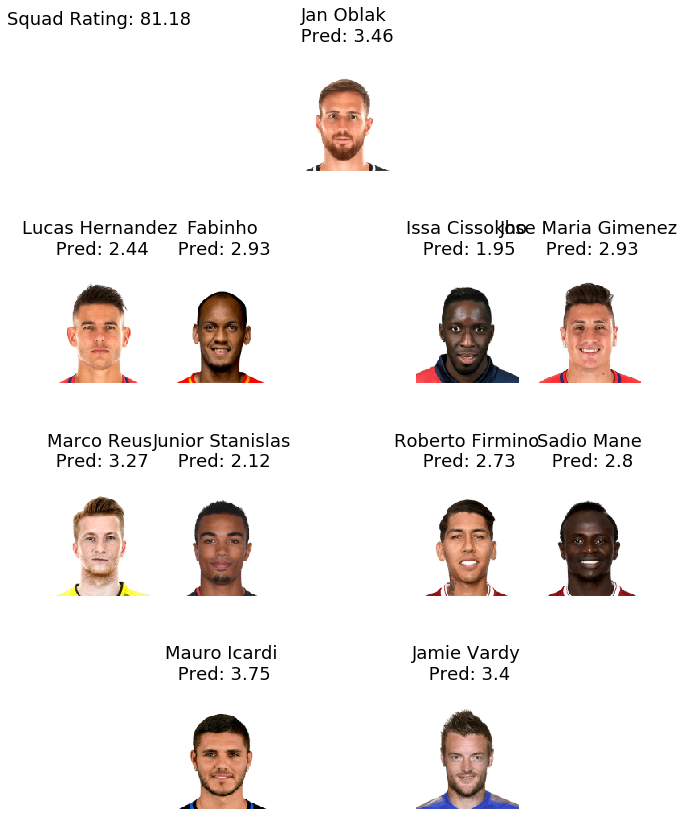

In [809]:
f, axarr = plt.subplots(4,7,figsize=(15,15))
fig = plt.figure()
axarr[0,0].set_visible(False)
axarr[0,1].set_visible(False)
axarr[0,3].set_visible(False)
axarr[0,5].set_visible(False)
axarr[0,6].set_visible(False)
axarr[1,0].set_visible(False)
axarr[1,1].set_visible(False)
axarr[2,0].set_visible(False)
axarr[2,1].set_visible(False)
axarr[1,4].set_visible(False)
axarr[2,4].set_visible(False)
axarr[3,0].set_visible(False)
axarr[3,1].set_visible(False)
axarr[3,4].set_visible(False)
axarr[3,6].set_visible(False)
axarr[3,4].set_visible(False)
axarr[3,2].set_visible(False)
axarr[3,6].set_visible(False)


axarr[0,2].set_title('Squad Rating: ' + Squad_Rating[:5])
axarr[0,2].axis('off')

axarr[0,4].imshow(GK1)
axarr[0,4].set_title(underrated_XI['Players'].loc[0] + '\n' + ' Pred: ' + underrated_XI['Predicted Form'].loc[0] + '\n' ) 
axarr[0,4].axis('off')


axarr[1,2].imshow(DF1)
axarr[1,2].set_title(underrated_XI['Players'].loc[1] + '\n' + ' Pred: ' + underrated_XI['Predicted Form'].loc[1] + '\n' ) 
axarr[1,2].axis('off')


axarr[1,3].imshow(DF2)
axarr[1,3].set_title(underrated_XI['Players'].loc[2] + '\n' + ' Pred: ' + underrated_XI['Predicted Form'].loc[2] + '\n')
axarr[1,3].axis('off')


axarr[1,5].imshow(DF3)
axarr[1,5].set_title(underrated_XI['Players'].loc[3] + '\n' + ' Pred: ' + underrated_XI['Predicted Form'].loc[3] + '\n') 
axarr[1,5].axis('off')


axarr[1,6].imshow(DF4)
axarr[1,6].set_title(underrated_XI['Players'].loc[4] + '\n' + ' Pred: ' + underrated_XI['Predicted Form'].loc[4] + '\n') 
axarr[1,6].axis('off')


axarr[2,2].imshow(MD1)
axarr[2,2].set_title(underrated_XI['Players'].loc[5] + '\n' + ' Pred: ' + underrated_XI['Predicted Form'].loc[5] + '\n') 
axarr[2,2].axis('off')


axarr[2,3].imshow(MD2)
axarr[2,3].set_title(underrated_XI['Players'].loc[6] + '\n' + ' Pred: ' + underrated_XI['Predicted Form'].loc[6] + '\n') 
axarr[2,3].axis('off')


axarr[2,5].imshow(MD3)
axarr[2,5].set_title(underrated_XI['Players'].loc[7] + '\n' + ' Pred: ' + underrated_XI['Predicted Form'].loc[7] + '\n') 
axarr[2,5].axis('off')


axarr[2,6].imshow(MD4)
axarr[2,6].set_title(underrated_XI['Players'].loc[8] + '\n' + ' Pred: ' + underrated_XI['Predicted Form'].loc[8] + '\n') 
axarr[2,6].axis('off')


axarr[3,3].imshow(FW1)
axarr[3,3].set_title(underrated_XI['Players'].loc[9] + '\n' + ' Pred: ' + underrated_XI['Predicted Form'].loc[9] + '\n') 
axarr[3,3].axis('off')

axarr[3,5].imshow(FW2)
axarr[3,5].set_title(underrated_XI['Players'].loc[10] + '\n' + ' Pred: ' + underrated_XI['Predicted Form'].loc[10] + '\n') 
axarr[3,5].axis('off')


f.savefig('../../data/analysis/Underrated_XI.png')


In [810]:
overrated_goalkeepers = overrated_players[overrated_players['Position']=='Goalkeeper']
overrated_defenders = overrated_players[overrated_players['Position']=='Defender']
overrated_midfielders = overrated_players[overrated_players['Position']=='Midfielder']
overrated_forwards = overrated_players[overrated_players['Position']=='Forward']

In [811]:
overrated_goalkeepers = overrated_goalkeepers.sort_values('Difference',ascending=False)
overrated_goalkeeper = overrated_goalkeepers.head(1)

overrated_defenders = overrated_defenders.sort_values('Difference',ascending=False)
overrated_defender = overrated_defenders.head(4)


overrated_midfielders = overrated_midfielders.sort_values('Difference',ascending=False)
overrated_midfielder = overrated_midfielders.head(4)


overrated_forwards = overrated_forwards.sort_values('Difference',ascending=False)
overrated_forward = overrated_forwards.head(2)

overrated_XI= pd.concat([overrated_goalkeeper,overrated_defender,overrated_midfielder,overrated_forward])

In [812]:
overrated_XI['photo'] = overrated_XI['photo'].replace('/18/','/1x/18/', regex=True)
overrated_XI = overrated_XI.reset_index()
overrated_XI['Predicted Form'] = overrated_XI['Predicted Form'].round(2)
overrated_XI['Predicted Form'] = overrated_XI['Predicted Form'].astype(str)
Squad_Rating = overrated_XI['overall'].sum()/11
Squad_Rating = str(Squad_Rating)

In [813]:
overrated_XI.round(2)

,index,Players,Position,club,league,age,nationality,overall,photo,injury_prone_trait,...,Average Apps/Season,Previous Average Form,Apps This Season,Current Average Form,Distance,Predicted Form,FIFA Rating Distance,Previous Form Distance,Difference,Verdict
0,5,Jorge Mere,Defender,1. FC Koln,German Bundesliga,20,Spain,78,https://cdn.sofifa.org/1x/18/players/223033.png,False,...,28.00,1.34,21.0,1.43,-1.18,2.52,1.09,0.09,1.00,Overrated
1,8,Tobias Strobl,Defender,Borussia Monchengladbach,German Bundesliga,27,Germany,76,https://cdn.sofifa.org/1x/18/players/207894.png,False,...,27.25,1.51,3.0,0.33,-0.84,2.36,2.02,1.18,0.84,Overrated
2,18,Ximo Navarro,Defender,UD Las Palmas,Spanish Primera Division,27,Spain,75,https://cdn.sofifa.org/1x/18/players/198023.png,False,...,44.00,1.52,28.0,1.29,-0.75,2.28,0.99,0.24,0.75,Overrated
3,22,Raphael Varane,Defender,Real Madrid CF,Spanish Primera Division,24,France,85,https://cdn.sofifa.org/1x/18/players/201535.png,False,...,26.25,2.90,25.0,2.80,-0.73,3.63,0.83,0.10,0.73,Overrated
4,1,Marco Verratti,Midfielder,Paris Saint-Germain,French Ligue 1,24,Italy,87,https://cdn.sofifa.org/1x/18/players/199556.png,False,...,33.50,2.23,22.0,1.91,-1.26,3.49,1.58,0.32,1.26,Overrated
5,2,N'Golo Kante,Midfielder,Chelsea,English Premier League,26,France,87,https://cdn.sofifa.org/1x/18/players/215914.png,False,...,36.33,2.28,31.0,2.16,-1.21,3.49,1.33,0.12,1.21,Overrated
6,3,Luka Modric,Midfielder,Real Madrid CF,Spanish Primera Division,31,Croatia,89,https://cdn.sofifa.org/1x/18/players/177003.png,False,...,35.00,2.40,23.0,2.61,-1.54,3.94,1.33,0.21,1.12,Overrated
7,6,Muhamed Besic,Midfielder,Everton,English Premier League,24,Bosnia Herzegovina,76,https://cdn.sofifa.org/1x/18/players/200765.png,True,...,17.50,1.37,2.0,1.00,-0.93,2.3,1.30,0.37,0.93,Overrated
8,0,Manu Trigueros,Forward,Villarreal CF,Spanish Primera Division,25,Spain,82,https://cdn.sofifa.org/1x/18/players/206545.png,False,...,34.25,2.09,31.0,2.13,-1.42,3.52,1.39,0.03,1.36,Overrated
9,4,Erik Moran,Forward,CD Leganes,Spanish Primera Division,26,Spain,72,https://cdn.sofifa.org/1x/18/players/201991.png,False,...,9.67,1.28,6.0,1.00,-1.07,2.35,1.35,0.28,1.07,Overrated


In [814]:
JoinedOverratedImages = overrated_XI['photo'].as_matrix()

QM = mpimg.imread('../../data/raw/blankface.png')
DF1 = mpimg.imread(JoinedOverratedImages [0])
DF2 = mpimg.imread(JoinedOverratedImages [1])
DF3 = mpimg.imread(JoinedOverratedImages [2])
DF4 = mpimg.imread(JoinedOverratedImages [3])
MD1 = mpimg.imread(JoinedOverratedImages [4])
MD2 = mpimg.imread(JoinedOverratedImages [5])
MD3 = mpimg.imread(JoinedOverratedImages [6])
MD4 = mpimg.imread(JoinedOverratedImages [7])
FW1 = mpimg.imread(JoinedOverratedImages [8])
FW2 = mpimg.imread(JoinedOverratedImages [9])

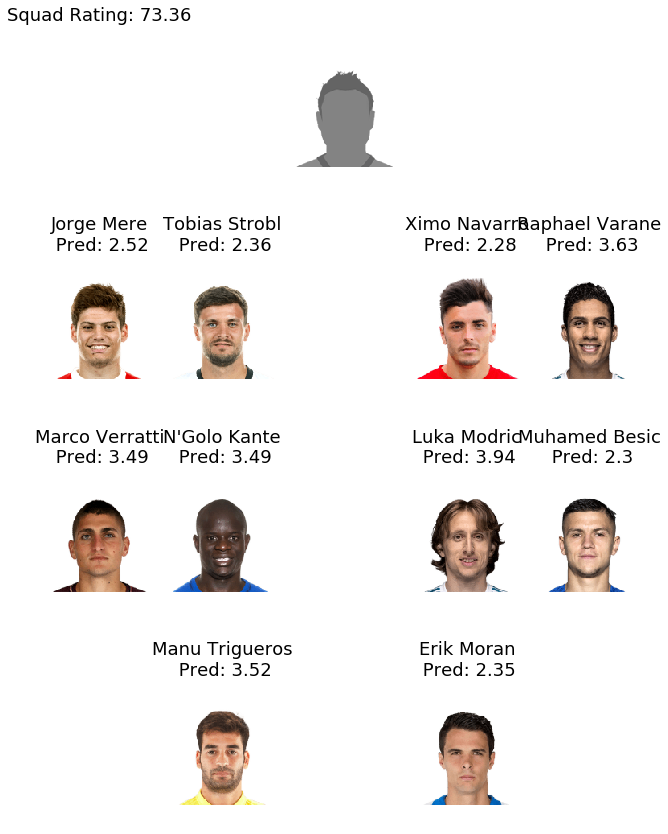

In [815]:
f, axarr = plt.subplots(4,7,figsize=(15,15))
fig = plt.figure()

axarr[0,0].set_visible(False)
axarr[0,1].set_visible(False)
axarr[0,3].set_visible(False)
axarr[0,5].set_visible(False)
axarr[0,6].set_visible(False)
axarr[1,0].set_visible(False)
axarr[1,1].set_visible(False)
axarr[1,4].set_visible(False)
axarr[2,0].set_visible(False)
axarr[2,1].set_visible(False)
axarr[2,4].set_visible(False)
axarr[3,0].set_visible(False)
axarr[3,1].set_visible(False)
axarr[3,4].set_visible(False)
axarr[3,6].set_visible(False)
axarr[3,4].set_visible(False)
axarr[3,2].set_visible(False)
axarr[3,6].set_visible(False)


axarr[0,2].set_title('Squad Rating: ' + Squad_Rating[:5])
axarr[0,2].axis('off')

axarr[0,4].imshow(QM)
axarr[0,4].axis('off')

axarr[1,2].imshow(DF1)
axarr[1,2].set_title(overrated_XI['Players'].loc[0] + '\n' + ' Pred: ' + overrated_XI['Predicted Form'].loc[0] + '\n') 
axarr[1,2].axis('off')


axarr[1,3].imshow(DF2)
axarr[1,3].set_title(overrated_XI['Players'].loc[1] + '\n' + ' Pred: ' + overrated_XI['Predicted Form'].loc[1] + '\n')
axarr[1,3].axis('off')


axarr[1,5].imshow(DF3)
axarr[1,5].set_title(overrated_XI['Players'].loc[2] + '\n' + ' Pred: ' + overrated_XI['Predicted Form'].loc[2] + '\n') 

axarr[1,5].axis('off')


axarr[1,6].imshow(DF4)
axarr[1,6].set_title(overrated_XI['Players'].loc[3] + '\n' + ' Pred: ' + overrated_XI['Predicted Form'].loc[3] + '\n') 
axarr[1,6].axis('off')


axarr[2,2].imshow(MD1)
axarr[2,2].set_title(overrated_XI['Players'].loc[4] + '\n' + ' Pred: ' + overrated_XI['Predicted Form'].loc[4] + '\n') 

axarr[2,2].axis('off')


axarr[2,3].imshow(MD2)
axarr[2,3].set_title(overrated_XI['Players'].loc[5] + '\n' + ' Pred: ' + overrated_XI['Predicted Form'].loc[5] + '\n') 
axarr[2,3].axis('off')


axarr[2,5].imshow(MD3)
axarr[2,5].set_title(overrated_XI['Players'].loc[6] + '\n' + ' Pred: ' + overrated_XI['Predicted Form'].loc[6] + '\n') 
axarr[2,5].axis('off')


axarr[2,6].imshow(MD4)
axarr[2,6].set_title(overrated_XI['Players'].loc[7] + '\n' + ' Pred: ' + overrated_XI['Predicted Form'].loc[7] + '\n') 
axarr[2,6].axis('off')


axarr[3,3].imshow(FW1)
axarr[3,3].set_title(overrated_XI['Players'].loc[8] + '\n' + ' Pred: ' + overrated_XI['Predicted Form'].loc[8] + '\n') 
axarr[3,3].axis('off')

axarr[3,5].imshow(FW2)
axarr[3,5].set_title(overrated_XI['Players'].loc[9] + '\n' + ' Pred: ' + overrated_XI['Predicted Form'].loc[9] + '\n' ) 
axarr[3,5].axis('off')



f.savefig('../../data/analysis/Overrated_XI.png')